# ML with Camera
기존 MLP로는 성능이 좋게 나오지 않았던 것을 기존 정통 머신러닝으로 해결 시도

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

% matplotlib inline

C:\Users\JoonHo Lee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit((255 - x_train)/255, y_train)

preds = model.predict((255 - x_test)/255)
np.mean(preds == y_test)

0.9473

0.1 3 [[0.  0.1 0.1 0.3 0.1 0.2 0.1 0.1 0.  0. ]]


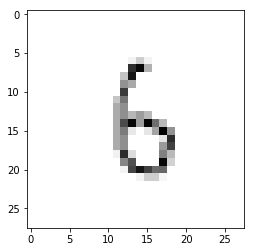

In [5]:
import cv2
test_img_path = 'C:/Users/JoonHo Lee/Desktop/JEJU ICT 2018/Deep Learning/Workspace/num_test.png'
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

# Interpolation 과정에서 문제가 있는 것을 확인 했다. Inter_Area로 수정 후 성능이 개선 된 것을 확인
test_img = cv2.resize(test_img/255, (28, 28), interpolation=cv2.INTER_AREA)
input_test = test_img.reshape((1, -1))

pred_prob = model.predict_proba(input_test)


print(pred_prob[0, 6], np.argmax(pred_prob), pred_prob)
plt.imshow(test_img, 'gray')
plt.show()

In [24]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Capture frame-by-frame
ret, frame = cap.read()


de_frame = cv2.fastNlMeansDenoisingColored(frame, None,10,10,7,21)

# Our operations on the frame come here
gray = cv2.cvtColor(de_frame, cv2.COLOR_BGR2GRAY)

#input image
min_size = min(gray.shape[0], gray.shape[1])
sliced_img = gray[gray.shape[0]//2-min_size//2:gray.shape[0]//2+min_size//2,
                  gray.shape[1]//2-min_size//2:gray.shape[1]//2+min_size//2]

#input의 사이즈를 28*28으로 학습 시켰기 때문에 input으로 받은 이미지를 28*28로 축소 시켜준다
input_resized = cv2.resize(sliced_img, (28, 28), interpolation=cv2.INTER_AREA)
input_image = np.reshape(input_resized / 255, (1, -1))

pred_probs = model.predict_proba(input_image)[0]
pred_number = np.argmax(pred_probs)

result = str(pred_number)  # 예측한 결과값을 argmax로 정답 유추   >> 1
prob = pred_probs[pred_number]

text = 'Result is %s with %.4f'  % (result, prob)  # Result is 1
cv2.putText(gray, text, (gray.shape[0] - 500, gray.shape[1]//2 + 120), cv2.FONT_HERSHEY_SIMPLEX, 2, 0, thickness=5)

# Display the resulting frame
cv2.imshow('frame',gray)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

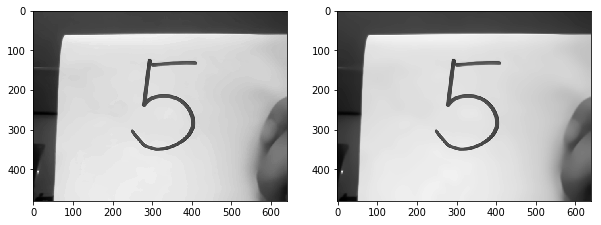

In [56]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(gray, 'gray')
plt.subplot(1,2,2)
plt.imshow(de_gray, 'gray')
plt.show()

8 [0.3 0.  0.  0.1 0.  0.  0.2 0.  0.4 0. ]
0.0


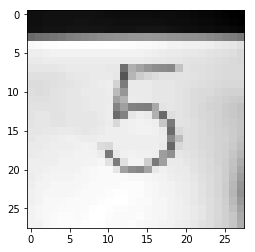

In [55]:
de_frame = cv2.fastNlMeansDenoisingColored(frame, None,10,10,7,21)

# Our operations on the frame come here
gray = cv2.cvtColor(de_frame, cv2.COLOR_BGR2GRAY)

de_gray = cv2.fastNlMeansDenoising(gray,None,10,7,21)

#input image
min_size = min(de_gray.shape[0], de_gray.shape[1])
sliced_img = de_gray[de_gray.shape[0]//2-min_size//2:de_gray.shape[0]//2+min_size//2,
                  de_gray.shape[1]//2-min_size//2:de_gray.shape[1]//2+min_size//2]

#input의 사이즈를 28*28으로 학습 시켰기 때문에 input으로 받은 이미지를 28*28로 축소 시켜준다
input_resized = cv2.resize(sliced_img, (28, 28), interpolation=cv2.INTER_AREA)
input_image = np.reshape(input_resized / 255, (1, -1))

pred_probs = model.predict_proba(input_image)[0]
pred_number = np.argmax(pred_probs)

print(pred_number, pred_probs)
print(pred_probs[5])
plt.imshow(input_resized, 'gray')
plt.show()

In [23]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #input image
    min_size = min(gray.shape[0], gray.shape[1])
    sliced_img = gray[gray.shape[0]//2-min_size//2:gray.shape[0]//2+min_size//2,
                      gray.shape[1]//2-min_size//2:gray.shape[1]//2+min_size//2]
    
    #input의 사이즈를 28*28으로 학습 시켰기 때문에 input으로 받은 이미지를 28*28로 축소 시켜준다
    input_resized = cv2.resize(sliced_img, (28, 28), interpolation=cv2.INTER_AREA)
    input_image = np.reshape(input_resized / 255, (1, -1))
    
    pred_probs = model.predict_proba(input_image)[0]
    pred_number = np.argmax(pred_probs)

    result = str(pred_number)  # 예측한 결과값을 argmax로 정답 유추   >> 1
    prob = pred_probs[pred_number]

    text = 'Result is %s with %.4f'  % (result, prob)  # Result is 1
    cv2.putText(gray, text, (gray.shape[0] - 500, gray.shape[1]//2 + 120), cv2.FONT_HERSHEY_SIMPLEX, 2, 0, thickness=5)
    
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
plt.imshow(frame)
plt.show()